In [2]:
import pandas as pd
log_shots_pca = pd.read_csv('nba_shots_2015_clustered.csv')

PLAYSTYLE VS WINS ANALYSIS

Team Success Dataset Created: 30 teams

STEP 1: CREATING PLAYER-TO-TEAM MAPPING
✓ Created mapping for 179 players

Sample mappings:
  jeff teague → Atlanta Hawks
  kyle korver → Atlanta Hawks
  demarre carroll → Atlanta Hawks
  paul millsap → Atlanta Hawks
  al horford → Atlanta Hawks

STEP 2: MAPPING SHOTS TO TEAMS
✓ Successfully mapped 82,606 shots (67.6%)
⚠️  Unmapped shots: 39,597 (32.4%)

Top unmapped players (these are likely bench players not in top 6):
  mnta ellis: 1003 shots
  dirk nowtizski: 793 shots
  dwayne wade: 685 shots
  jared sullinger: 642 shots
  jj redick: 636 shots
  gerald green: 608 shots
  time hardaway jr: 555 shots
  oj mayo: 538 shots
  evan fournier: 536 shots
  mo williams: 530 shots

STEP 3: CREATING TEAM SHOT PROFILES
Using 82,606 shots from mapped players
✓ Team shot profiles created
  Teams with data: 30
  Clusters tracked: ['High ISO / Creator', 'Normal Flow / Mid-Range', 'Paint / Rim Finisher', 'Spot-up / Catch-and-Shoot'

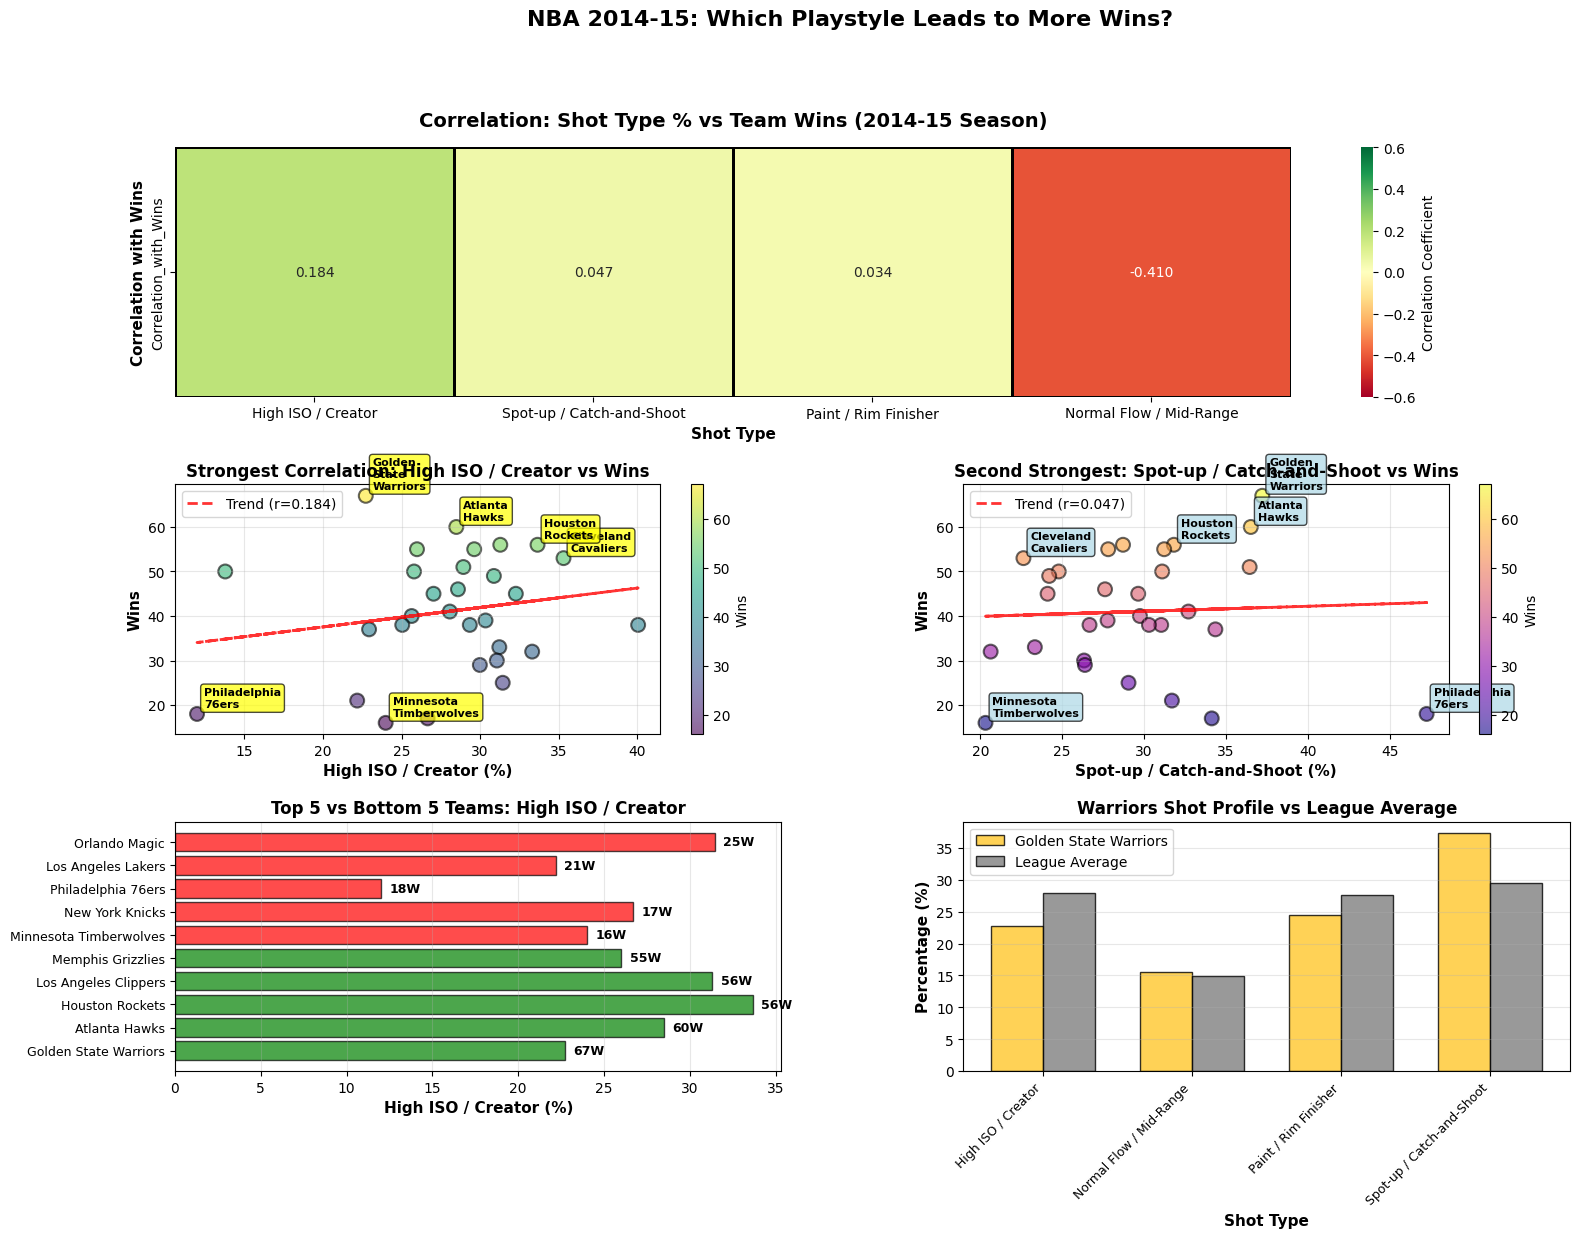


✅ ANALYSIS COMPLETE

KEY FINDINGS:

1. STRONGEST CORRELATION:
   • High ISO / Creator: r = 0.184
   • P-value: 0.3306

2. TOP TEAMS' PLAYSTYLE:
   • Golden State Warriors (67W): 22.7% High ISO / Creator
   • Atlanta Hawks (60W): 28.5% High ISO / Creator
   • Cleveland Cavaliers (53W): 35.3% High ISO / Creator

3. ANSWER TO "WHICH PLAYSTYLE LEADS TO MORE WINS?":
   • Teams with MORE High ISO / Creator shots tend to WIN MORE
   • Correlation strength: Weak

Dataset saved as: merged_data

NOTE: Analysis based on top 6 players per team (rotation players).
Unmapped shots from bench players were excluded from team profiles.



In [4]:
# ============================================================================
# PLAYSTYLE VS WINS ANALYSIS - WHICH SHOT TYPE LEADS TO SUCCESS?
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 0: CREATE TEAM SUCCESS DATASET WITH PLAYER MAPPINGS
# ============================================================================

data = [
    # East Conference
    {'Conference': 'East', 'Rank': 1, 'Team': 'Atlanta Hawks', 'Wins': 60, 'Losses': 22, 'Players': 'Jeff Teague; Kyle Korver; DeMarre Carroll; Paul Millsap; Al Horford; Dennis Schroder'},
    {'Conference': 'East', 'Rank': 2, 'Team': 'Cleveland Cavaliers', 'Wins': 53, 'Losses': 29, 'Players': 'Kyrie Irving; J.R. Smith; LeBron James; Kevin Love; Timofey Mozgov; Tristan Thompson'},
    {'Conference': 'East', 'Rank': 3, 'Team': 'Chicago Bulls', 'Wins': 50, 'Losses': 32, 'Players': 'Derrick Rose; Jimmy Butler; Mike Dunleavy; Pau Gasol; Joakim Noah; Taj Gibson'},
    {'Conference': 'East', 'Rank': 4, 'Team': 'Toronto Raptors', 'Wins': 49, 'Losses': 33, 'Players': 'Kyle Lowry; DeMar DeRozan; Terrence Ross; Amir Johnson; Jonas Valanciunas; Lou Williams'},
    {'Conference': 'East', 'Rank': 5, 'Team': 'Washington Wizards', 'Wins': 46, 'Losses': 36, 'Players': 'John Wall; Bradley Beal; Paul Pierce; Nene Hilario; Marcin Gortat; Otto Porter Jr.'},
    {'Conference': 'East', 'Rank': 6, 'Team': 'Milwaukee Bucks', 'Wins': 41, 'Losses': 41, 'Players': 'Michael Carter-Williams; Khris Middleton; Giannis Antetokounmpo; Ersan Ilyasova; Zaza Pachulia; Jared Dudley'},
    {'Conference': 'East', 'Rank': 7, 'Team': 'Boston Celtics', 'Wins': 40, 'Losses': 42, 'Players': 'Marcus Smart; Avery Bradley; Evan Turner; Brandon Bass; Tyler Zeller; Isaiah Thomas'},
    {'Conference': 'East', 'Rank': 8, 'Team': 'Brooklyn Nets', 'Wins': 38, 'Losses': 44, 'Players': 'Deron Williams; Joe Johnson; Bojan Bogdanovic; Thaddeus Young; Brook Lopez; Jarrett Jack'},
    {'Conference': 'East', 'Rank': 9, 'Team': 'Indiana Pacers', 'Wins': 38, 'Losses': 44, 'Players': 'George Hill; C.J. Miles; Solomon Hill; David West; Roy Hibbert; Rodney Stuckey'},
    {'Conference': 'East', 'Rank': 10, 'Team': 'Miami Heat', 'Wins': 37, 'Losses': 45, 'Players': 'Goran Dragic; Dwyane Wade; Luol Deng; Udonis Haslem; Hassan Whiteside; Chris Bosh'},
    {'Conference': 'East', 'Rank': 11, 'Team': 'Charlotte Hornets', 'Wins': 33, 'Losses': 49, 'Players': 'Kemba Walker; Gerald Henderson; Michael Kidd-Gilchrist; Cody Zeller; Al Jefferson; Lance Stephenson'},
    {'Conference': 'East', 'Rank': 12, 'Team': 'Detroit Pistons', 'Wins': 32, 'Losses': 50, 'Players': 'Reggie Jackson; Kentavious Caldwell-Pope; Caron Butler; Greg Monroe; Andre Drummond; Brandon Jennings'},
    {'Conference': 'East', 'Rank': 13, 'Team': 'Orlando Magic', 'Wins': 25, 'Losses': 57, 'Players': 'Elfrid Payton; Victor Oladipo; Tobias Harris; Channing Frye; Nikola Vucevic; Aaron Gordon'},
    {'Conference': 'East', 'Rank': 14, 'Team': 'Philadelphia 76ers', 'Wins': 18, 'Losses': 64, 'Players': 'Ish Smith; Robert Covington; Luc Mbah a Moute; Nerlens Noel; Henry Sims; Jerami Grant'},
    {'Conference': 'East', 'Rank': 15, 'Team': 'New York Knicks', 'Wins': 17, 'Losses': 65, 'Players': 'Jose Calderon; Langston Galloway; Carmelo Anthony; Lou Amundson; Andrea Bargnani; Tim Hardaway Jr.'},
    
    # West Conference
    {'Conference': 'West', 'Rank': 1, 'Team': 'Golden State Warriors', 'Wins': 67, 'Losses': 15, 'Players': 'Stephen Curry; Klay Thompson; Harrison Barnes; Draymond Green; Andrew Bogut; Andre Iguodala'},
    {'Conference': 'West', 'Rank': 2, 'Team': 'Houston Rockets', 'Wins': 56, 'Losses': 26, 'Players': 'Patrick Beverley; James Harden; Trevor Ariza; Donatas Motiejunas; Dwight Howard; Josh Smith'},
    {'Conference': 'West', 'Rank': 3, 'Team': 'Los Angeles Clippers', 'Wins': 56, 'Losses': 26, 'Players': 'Chris Paul; J.J. Redick; Matt Barnes; Blake Griffin; DeAndre Jordan; Jamal Crawford'},
    {'Conference': 'West', 'Rank': 4, 'Team': 'Portland Trail Blazers', 'Wins': 51, 'Losses': 31, 'Players': 'Damian Lillard; Wesley Matthews; Nicolas Batum; LaMarcus Aldridge; Robin Lopez; Chris Kaman'},
    {'Conference': 'West', 'Rank': 5, 'Team': 'Memphis Grizzlies', 'Wins': 55, 'Losses': 27, 'Players': 'Mike Conley; Courtney Lee; Tony Allen; Zach Randolph; Marc Gasol; Jeff Green'},
    {'Conference': 'West', 'Rank': 6, 'Team': 'San Antonio Spurs', 'Wins': 55, 'Losses': 27, 'Players': 'Tony Parker; Danny Green; Kawhi Leonard; Tim Duncan; Tiago Splitter; Manu Ginobili'},
    {'Conference': 'West', 'Rank': 7, 'Team': 'Dallas Mavericks', 'Wins': 50, 'Losses': 32, 'Players': "Rajon Rondo; Monta Ellis; Chandler Parsons; Dirk Nowitzki; Tyson Chandler; Amar'e Stoudemire"},
    {'Conference': 'West', 'Rank': 8, 'Team': 'New Orleans Pelicans', 'Wins': 45, 'Losses': 37, 'Players': 'Jrue Holiday; Eric Gordon; Tyreke Evans; Anthony Davis; Omer Asik; Ryan Anderson'},
    {'Conference': 'West', 'Rank': 9, 'Team': 'Oklahoma City Thunder', 'Wins': 45, 'Losses': 37, 'Players': 'Russell Westbrook; Andre Roberson; Kevin Durant; Serge Ibaka; Steven Adams; Enes Kanter'},
    {'Conference': 'West', 'Rank': 10, 'Team': 'Phoenix Suns', 'Wins': 39, 'Losses': 43, 'Players': 'Eric Bledsoe; Brandon Knight; P.J. Tucker; Markieff Morris; Alex Len; Marcus Morris'},
    {'Conference': 'West', 'Rank': 11, 'Team': 'Utah Jazz', 'Wins': 38, 'Losses': 44, 'Players': 'Dante Exum; Rodney Hood; Gordon Hayward; Derrick Favors; Rudy Gobert; Trey Burke'},
    {'Conference': 'West', 'Rank': 12, 'Team': 'Denver Nuggets', 'Wins': 30, 'Losses': 52, 'Players': 'Ty Lawson; Arron Afflalo; Wilson Chandler; Kenneth Faried; Jusuf Nurkic; Danilo Gallinari'},
    {'Conference': 'West', 'Rank': 13, 'Team': 'Sacramento Kings', 'Wins': 29, 'Losses': 53, 'Players': 'Darren Collison; Ben McLemore; Rudy Gay; Jason Thompson; DeMarcus Cousins; Omri Casspi'},
    {'Conference': 'West', 'Rank': 14, 'Team': 'Los Angeles Lakers', 'Wins': 21, 'Losses': 61, 'Players': 'Jordan Clarkson; Wayne Ellington; Wesley Johnson; Carlos Boozer; Jordan Hill; Kobe Bryant'},
    {'Conference': 'West', 'Rank': 15, 'Team': 'Minnesota Timberwolves', 'Wins': 16, 'Losses': 66, 'Players': 'Ricky Rubio; Kevin Martin; Andrew Wiggins; Thaddeus Young; Gorgui Dieng; Zach LaVine'}
]

df = pd.DataFrame(data)

print("="*80)
print("PLAYSTYLE VS WINS ANALYSIS")
print("="*80)
print(f"\nTeam Success Dataset Created: {len(df)} teams")

# ============================================================================
# STEP 1: CREATE PLAYER-TO-TEAM MAPPING
# ============================================================================

print("\n" + "="*80)
print("STEP 1: CREATING PLAYER-TO-TEAM MAPPING")
print("="*80)

# Create player to team dictionary
player_to_team = {}

for idx, row in df.iterrows():
    team = row['Team']
    players = row['Players'].split('; ')
    
    for player in players:
        # Normalize player name (lowercase, strip whitespace)
        player_normalized = player.lower().strip()
        player_to_team[player_normalized] = team

print(f"✓ Created mapping for {len(player_to_team)} players")
print(f"\nSample mappings:")
sample_players = list(player_to_team.items())[:5]
for player, team in sample_players:
    print(f"  {player} → {team}")

# ============================================================================
# STEP 2: MAP PLAYERS TO TEAMS IN SHOT DATA
# ============================================================================

print("\n" + "="*80)
print("STEP 2: MAPPING SHOTS TO TEAMS")
print("="*80)

# Normalize player names in shot data
log_shots_pca['player_name_normalized'] = log_shots_pca['player_name'].str.lower().str.strip()

# Map to team
log_shots_pca['Team'] = log_shots_pca['player_name_normalized'].map(player_to_team)

# Check mapping success
mapped_shots = log_shots_pca['Team'].notna().sum()
total_shots = len(log_shots_pca)
unmapped_shots = total_shots - mapped_shots

print(f"✓ Successfully mapped {mapped_shots:,} shots ({mapped_shots/total_shots*100:.1f}%)")
print(f"⚠️  Unmapped shots: {unmapped_shots:,} ({unmapped_shots/total_shots*100:.1f}%)")

# Show which players were not mapped
unmapped_players = log_shots_pca[log_shots_pca['Team'].isna()]['player_name_normalized'].value_counts().head(10)
if len(unmapped_players) > 0:
    print(f"\nTop unmapped players (these are likely bench players not in top 6):")
    for player, count in unmapped_players.items():
        print(f"  {player}: {count} shots")

# ============================================================================
# STEP 3: CREATE TEAM SHOT PROFILES
# ============================================================================

print("\n" + "="*80)
print("STEP 3: CREATING TEAM SHOT PROFILES")
print("="*80)

# Filter out unmapped shots
shots_with_teams = log_shots_pca[log_shots_pca['Team'].notna()].copy()

print(f"Using {len(shots_with_teams):,} shots from mapped players")

# Group by team and cluster, count shots
team_cluster_counts = shots_with_teams.groupby(['Team', 'Cluster_Description']).size().reset_index(name='shot_count')

# Calculate total shots per team
team_totals = shots_with_teams.groupby('Team').size().reset_index(name='total_shots')

# Merge and calculate percentages
team_cluster_counts = team_cluster_counts.merge(team_totals, on='Team')
team_cluster_counts['percentage'] = (team_cluster_counts['shot_count'] / team_cluster_counts['total_shots']) * 100

# Pivot to get team shot profiles
team_shot_profiles = team_cluster_counts.pivot(
    index='Team',
    columns='Cluster_Description',
    values='percentage'
).fillna(0)

print(f"✓ Team shot profiles created")
print(f"  Teams with data: {len(team_shot_profiles)}")
print(f"  Clusters tracked: {list(team_shot_profiles.columns)}")

print("\nShots per team:")
print(team_totals.sort_values('total_shots', ascending=False).to_string(index=False))

# ============================================================================
# STEP 4: MERGE WITH WINS DATA
# ============================================================================

print("\n" + "="*80)
print("STEP 4: MERGING WITH TEAM WINS DATA")
print("="*80)

# Merge with wins data
merged_data = team_shot_profiles.merge(
    df[['Team', 'Wins', 'Losses', 'Conference', 'Rank']],
    left_index=True,
    right_on='Team',
    how='inner'
)

print(f"✓ Teams successfully merged: {len(merged_data)}/30")

if len(merged_data) < 30:
    print(f"\n⚠️  Warning: Only {len(merged_data)} teams merged.")
    missing_teams = set(df['Team']) - set(merged_data['Team'])
    if missing_teams:
        print(f"Missing teams (no shots from top 6 players): {missing_teams}")

print(f"\nMerged dataset shape: {merged_data.shape}")

# ============================================================================
# STEP 5: CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("STEP 5: CORRELATION ANALYSIS - PLAYSTYLE VS WINS")
print("="*80)

# Get cluster columns (exclude non-numeric columns)
cluster_columns = [col for col in merged_data.columns if col not in ['Team', 'Wins', 'Losses', 'Conference', 'Rank']]

# Remove 'Unknown' if present
if 'Unknown' in cluster_columns:
    cluster_columns.remove('Unknown')

# Calculate correlations with Wins
correlations = {}
p_values = {}

for cluster in cluster_columns:
    corr, p_val = pearsonr(merged_data[cluster], merged_data['Wins'])
    correlations[cluster] = corr
    p_values[cluster] = p_val

# Create correlation dataframe
corr_df = pd.DataFrame({
    'Shot_Type': list(correlations.keys()),
    'Correlation_with_Wins': list(correlations.values()),
    'P_Value': list(p_values.values())
}).sort_values('Correlation_with_Wins', ascending=False)

print("\nCorrelation between Shot Types and Wins:")
print("-" * 80)
print(corr_df.to_string(index=False))

# Find strongest correlation
strongest_cluster = corr_df.iloc[0]['Shot_Type']
strongest_corr = corr_df.iloc[0]['Correlation_with_Wins']

print(f"\n🏆 STRONGEST CORRELATION:")
print(f"   {strongest_cluster}: r = {strongest_corr:.3f}")
if abs(strongest_corr) > 0.5:
    print(f"   ✓ Strong correlation!")
elif abs(strongest_corr) > 0.3:
    print(f"   ✓ Moderate correlation")
else:
    print(f"   ⚠️  Weak correlation")

# ============================================================================
# STEP 6: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 6: CREATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.35, wspace=0.3)

# ============================================================================
# CHART 1: CORRELATION HEATMAP
# ============================================================================

ax1 = fig.add_subplot(gs[0, :])

# Prepare data for heatmap
heatmap_data = corr_df.set_index('Shot_Type')[['Correlation_with_Wins']].T

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', center=0,
            ax=ax1, cbar_kws={'label': 'Correlation Coefficient'},
            vmin=-0.6, vmax=0.6, linewidths=2, linecolor='black')

ax1.set_title('Correlation: Shot Type % vs Team Wins (2014-15 Season)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_ylabel('Correlation with Wins', fontsize=11, fontweight='bold')
ax1.set_xlabel('Shot Type', fontsize=11, fontweight='bold')

# ============================================================================
# CHART 2: SCATTER PLOT - STRONGEST CORRELATION
# ============================================================================

ax2 = fig.add_subplot(gs[1, 0])

x = merged_data[strongest_cluster]
y = merged_data['Wins']

# Create scatter plot
scatter = ax2.scatter(x, y, s=100, alpha=0.6, c=merged_data['Wins'], 
                     cmap='viridis', edgecolors='black', linewidth=1.5)

# Add regression line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax2.plot(x, p(x), "r--", linewidth=2, alpha=0.8, label=f'Trend (r={strongest_corr:.3f})')

# Label specific teams
highlight_teams = ['Golden State Warriors', 'Atlanta Hawks', 'Cleveland Cavaliers', 
                  'Houston Rockets', 'Philadelphia 76ers', 'Minnesota Timberwolves']

for idx, row in merged_data.iterrows():
    if row['Team'] in highlight_teams:
        ax2.annotate(row['Team'].replace(' ', '\n'), 
                    (row[strongest_cluster], row['Wins']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax2.set_xlabel(f'{strongest_cluster} (%)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Wins', fontsize=11, fontweight='bold')
ax2.set_title(f'Strongest Correlation: {strongest_cluster} vs Wins', 
              fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.colorbar(scatter, ax=ax2, label='Wins')

# ============================================================================
# CHART 3: SCATTER PLOT - SECOND STRONGEST
# ============================================================================

ax3 = fig.add_subplot(gs[1, 1])

if len(corr_df) > 1:
    second_cluster = corr_df.iloc[1]['Shot_Type']
    second_corr = corr_df.iloc[1]['Correlation_with_Wins']
    
    x2 = merged_data[second_cluster]
    y2 = merged_data['Wins']
    
    scatter2 = ax3.scatter(x2, y2, s=100, alpha=0.6, c=merged_data['Wins'], 
                         cmap='plasma', edgecolors='black', linewidth=1.5)
    
    # Add regression line
    z2 = np.polyfit(x2, y2, 1)
    p2 = np.poly1d(z2)
    ax3.plot(x2, p2(x2), "r--", linewidth=2, alpha=0.8, label=f'Trend (r={second_corr:.3f})')
    
    for idx, row in merged_data.iterrows():
        if row['Team'] in highlight_teams:
            ax3.annotate(row['Team'].replace(' ', '\n'), 
                        (row[second_cluster], row['Wins']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
    
    ax3.set_xlabel(f'{second_cluster} (%)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Wins', fontsize=11, fontweight='bold')
    ax3.set_title(f'Second Strongest: {second_cluster} vs Wins', 
                  fontsize=12, fontweight='bold')
    ax3.legend(fontsize=10)
    ax3.grid(True, alpha=0.3)
    
    plt.colorbar(scatter2, ax=ax3, label='Wins')

# ============================================================================
# CHART 4: BAR CHART - TOP AND BOTTOM TEAMS
# ============================================================================

ax4 = fig.add_subplot(gs[2, 0])

# Get top 5 and bottom 5 teams
top_teams = merged_data.nlargest(5, 'Wins')
bottom_teams = merged_data.nsmallest(5, 'Wins')
comparison_teams = pd.concat([top_teams, bottom_teams])

# Plot
x_pos = np.arange(len(comparison_teams))
bars = ax4.barh(x_pos, comparison_teams[strongest_cluster], 
                color=['green']*5 + ['red']*5, alpha=0.7, edgecolor='black')

ax4.set_yticks(x_pos)
ax4.set_yticklabels(comparison_teams['Team'], fontsize=9)
ax4.set_xlabel(f'{strongest_cluster} (%)', fontsize=11, fontweight='bold')
ax4.set_title(f'Top 5 vs Bottom 5 Teams: {strongest_cluster}', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='x')

# Add wins labels
for i, (bar, wins) in enumerate(zip(bars, comparison_teams['Wins'])):
    width = bar.get_width()
    ax4.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(wins)}W',
            ha='left', va='center', fontsize=9, fontweight='bold')

# ============================================================================
# CHART 5: SHOT PROFILE COMPARISON
# ============================================================================

ax5 = fig.add_subplot(gs[2, 1])

# Compare Warriors and average team
warriors_data = merged_data[merged_data['Team'] == 'Golden State Warriors'][cluster_columns].values.flatten()
league_avg = merged_data[cluster_columns].mean().values

x_pos = np.arange(len(cluster_columns))
width = 0.35

bars1 = ax5.bar(x_pos - width/2, warriors_data, width, label='Golden State Warriors',
               color='#FFC72C', alpha=0.8, edgecolor='black')
bars2 = ax5.bar(x_pos + width/2, league_avg, width, label='League Average',
               color='gray', alpha=0.8, edgecolor='black')

ax5.set_xlabel('Shot Type', fontsize=11, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax5.set_title('Warriors Shot Profile vs League Average', fontsize=12, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(cluster_columns, rotation=45, ha='right', fontsize=9)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3, axis='y')

plt.suptitle('NBA 2014-15: Which Playstyle Leads to More Wins?', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE")
print("="*80)

print(f"""
KEY FINDINGS:

1. STRONGEST CORRELATION:
   • {strongest_cluster}: r = {strongest_corr:.3f}
   • P-value: {p_values[strongest_cluster]:.4f}

2. TOP TEAMS' PLAYSTYLE:
   • Golden State Warriors (67W): {merged_data[merged_data['Team']=='Golden State Warriors'][strongest_cluster].values[0]:.1f}% {strongest_cluster}
   • Atlanta Hawks (60W): {merged_data[merged_data['Team']=='Atlanta Hawks'][strongest_cluster].values[0]:.1f}% {strongest_cluster}
   • Cleveland Cavaliers (53W): {merged_data[merged_data['Team']=='Cleveland Cavaliers'][strongest_cluster].values[0]:.1f}% {strongest_cluster}

3. ANSWER TO "WHICH PLAYSTYLE LEADS TO MORE WINS?":
   • {'Teams with MORE ' + strongest_cluster + ' shots tend to WIN MORE' if strongest_corr > 0 else 'Teams with FEWER ' + strongest_cluster + ' shots tend to WIN MORE'}
   • Correlation strength: {'Strong' if abs(strongest_corr) > 0.5 else 'Moderate' if abs(strongest_corr) > 0.3 else 'Weak'}

Dataset saved as: merged_data

NOTE: Analysis based on top 6 players per team (rotation players).
Unmapped shots from bench players were excluded from team profiles.
""")

In [7]:
# ============================================================================
# DECISION TREE MODEL FOR SHOT SUCCESS PREDICTION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("DECISION TREE MODEL - SHOT SUCCESS PREDICTION")
print("="*80)

# ============================================================================
# STEP 1: PREPARE DATA
# ============================================================================

print("\n" + "="*80)
print("STEP 1: DATA PREPARATION")
print("="*80)

# Create a copy of the data
df_model = log_shots_pca.copy()

# Remove rows with missing values in key columns
required_cols = ['SHOT_RESULT', 'PC1', 'PC2', 'PC3', 'Cluster_Description']
df_model = df_model.dropna(subset=required_cols)

print(f"Dataset size: {len(df_model):,} shots")
print(f"Features: PC1, PC2, PC3, Cluster_Description")
print(f"Target: SHOT_RESULT (Made/Missed)")

# Check target variable distribution
target_dist = df_model['SHOT_RESULT'].value_counts()
print(f"\nTarget Distribution:")
print(target_dist)
print(f"\nSuccess Rate: {target_dist.get('made', 0) / len(df_model) * 100:.2f}%")

# ============================================================================
# STEP 2: FEATURE ENGINEERING
# ============================================================================

print("\n" + "="*80)
print("STEP 2: FEATURE ENGINEERING")
print("="*80)

# Encode categorical variables
label_encoder = LabelEncoder()
df_model['Cluster_Encoded'] = label_encoder.fit_transform(df_model['Cluster_Description'])

print("✓ Cluster labels encoded:")
for i, cluster in enumerate(label_encoder.classes_):
    print(f"  {cluster} → {i}")

# Create binary target (1 = made, 0 = missed)
df_model['Shot_Made'] = (df_model['SHOT_RESULT'] == 'made').astype(int)

# Select features for model
feature_cols = ['PC1', 'PC2', 'PC3', 'Cluster_Encoded']
X = df_model[feature_cols]
y = df_model['Shot_Made']

print(f"\n✓ Feature matrix: {X.shape}")
print(f"✓ Target vector: {y.shape}")

# ============================================================================
# STEP 3: TRAIN-TEST SPLIT
# ============================================================================

print("\n" + "="*80)
print("STEP 3: TRAIN-TEST SPLIT")
print("="*80)

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Training set: {len(X_train):,} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test):,} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

# ============================================================================
# STEP 4: BUILD BASELINE MODEL
# ============================================================================

print("\n" + "="*80)
print("STEP 4: BASELINE DECISION TREE MODEL")
print("="*80)

# Create baseline model
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train, y_train)

# Make predictions
y_train_pred_baseline = dt_baseline.predict(X_train)
y_test_pred_baseline = dt_baseline.predict(X_test)

# Evaluate
train_acc_baseline = accuracy_score(y_train, y_train_pred_baseline)
test_acc_baseline = accuracy_score(y_test, y_test_pred_baseline)

print(f"Baseline Model Performance:")
print(f"  Training Accuracy: {train_acc_baseline:.4f}")
print(f"  Test Accuracy: {test_acc_baseline:.4f}")
print(f"  Overfitting: {train_acc_baseline - test_acc_baseline:.4f}")

# ============================================================================
# STEP 5: HYPERPARAMETER TUNING
# ============================================================================

print("\n" + "="*80)
print("STEP 5: HYPERPARAMETER TUNING (GRID SEARCH)")
print("="*80)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

print("Searching for best parameters...")
print(f"Total combinations to test: {7 * 4 * 4 * 2} = 224")

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Best parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\n✓ Best cross-validation score: {grid_search.best_score_:.4f}")

# ============================================================================
# STEP 6: TRAIN OPTIMIZED MODEL
# ============================================================================

print("\n" + "="*80)
print("STEP 6: OPTIMIZED DECISION TREE MODEL")
print("="*80)

# Get best model
dt_optimized = grid_search.best_estimator_

# Make predictions
y_train_pred = dt_optimized.predict(X_train)
y_test_pred = dt_optimized.predict(X_test)
y_test_proba = dt_optimized.predict_proba(X_test)[:,1]
print(dt_optimized.predict_proba(X_test))
# Evaluate
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print(f"Optimized Model Performance:")
print(f"  Training Accuracy: {train_acc:.4f}")
print(f"  Test Accuracy: {test_acc:.4f}")
print(f"  Test Precision: {test_precision:.4f}")
print(f"  Test Recall: {test_recall:.4f}")
print(f"  Test F1-Score: {test_f1:.4f}")
print(f"  Test AUC-ROC: {test_auc:.4f}")

print(f"\nImprovement over baseline:")
print(f"  Accuracy gain: {test_acc - test_acc_baseline:.4f}")
print(f"  Overfitting reduced: {(train_acc_baseline - test_acc_baseline) - (train_acc - test_acc):.4f}")

# ============================================================================
# STEP 7: FEATURE IMPORTANCE
# ============================================================================

print("\n" + "="*80)
print("STEP 7: FEATURE IMPORTANCE")
print("="*80)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt_optimized.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n", feature_importance.to_string(index=False))

# ============================================================================
# STEP 8: CONFUSION MATRIX & CLASSIFICATION REPORT
# ============================================================================

print("\n" + "="*80)
print("STEP 8: DETAILED EVALUATION")
print("="*80)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, 
                          target_names=['Missed', 'Made']))

# ============================================================================
# STEP 9: VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("STEP 9: CREATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# ============================================================================
# PLOT 1: DECISION TREE VISUALIZATION (SMALL)
# ============================================================================

ax1 = fig.add_subplot(gs[0, :])

# Create a shallow tree for visualization
dt_visual = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_visual.fit(X_train, y_train)

plot_tree(dt_visual, 
         feature_names=feature_cols,
         class_names=['Missed', 'Made'],
         filled=True,
         rounded=True,
         fontsize=9,
         ax=ax1)

ax1.set_title('Decision Tree (Max Depth=3 for Visualization)', 
             fontsize=13, fontweight='bold')

# ============================================================================
# PLOT 2: FEATURE IMPORTANCE BAR CHART
# ============================================================================

ax2 = fig.add_subplot(gs[1, 0])

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']
bars = ax2.barh(feature_importance['Feature'], 
               feature_importance['Importance'],
               color=colors, alpha=0.8, edgecolor='black')

ax2.set_xlabel('Importance', fontsize=11, fontweight='bold')
ax2.set_title('Feature Importance', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for bar, imp in zip(bars, feature_importance['Importance']):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{imp:.3f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

# ============================================================================
# PLOT 3: CONFUSION MATRIX HEATMAP
# ============================================================================

ax3 = fig.add_subplot(gs[1, 1])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Missed', 'Made'],
           yticklabels=['Missed', 'Made'],
           ax=ax3, cbar_kws={'label': 'Count'})

ax3.set_xlabel('Predicted', fontsize=11, fontweight='bold')
ax3.set_ylabel('Actual', fontsize=11, fontweight='bold')
ax3.set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# ============================================================================
# PLOT 4: ROC CURVE
# ============================================================================

ax4 = fig.add_subplot(gs[1, 2])

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

ax4.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC curve (AUC = {roc_auc:.3f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
        label='Random Classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
ax4.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
ax4.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax4.legend(loc="lower right", fontsize=10)
ax4.grid(True, alpha=0.3)

# ============================================================================
# PLOT 5: TRAINING VS TEST PERFORMANCE
# ============================================================================

ax5 = fig.add_subplot(gs[2, 0])

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_scores = [
    accuracy_score(y_train, y_train_pred),
    precision_score(y_train, y_train_pred),
    recall_score(y_train, y_train_pred),
    f1_score(y_train, y_train_pred)
]
test_scores = [test_acc, test_precision, test_recall, test_f1]

x_pos = np.arange(len(metrics))
width = 0.35

bars1 = ax5.bar(x_pos - width/2, train_scores, width, 
               label='Training', color='green', alpha=0.8, edgecolor='black')
bars2 = ax5.bar(x_pos + width/2, test_scores, width, 
               label='Test', color='blue', alpha=0.8, edgecolor='black')

ax5.set_ylabel('Score', fontsize=11, fontweight='bold')
ax5.set_title('Model Performance: Training vs Test', fontsize=12, fontweight='bold')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(metrics, rotation=45, ha='right')
ax5.legend(fontsize=10)
ax5.set_ylim([0, 1.0])
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

# ============================================================================
# PLOT 6: PREDICTION PROBABILITY DISTRIBUTION
# ============================================================================

ax6 = fig.add_subplot(gs[2, 1])

# Separate probabilities by actual outcome
made_probs = y_test_proba[y_test == 1]
missed_probs = y_test_proba[y_test == 0]

ax6.hist(missed_probs, bins=50, alpha=0.6, label='Actually Missed', 
        color='red', edgecolor='black')
ax6.hist(made_probs, bins=50, alpha=0.6, label='Actually Made', 
        color='green', edgecolor='black')

ax6.set_xlabel('Predicted Probability of Making Shot', fontsize=11, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax6.set_title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
ax6.legend(fontsize=10)
ax6.grid(True, alpha=0.3, axis='y')

# ============================================================================
# PLOT 7: CLUSTER PERFORMANCE
# ============================================================================

ax7 = fig.add_subplot(gs[2, 2])

# Create test dataframe with predictions
test_df = X_test.copy()
test_df['Actual'] = y_test.values
test_df['Predicted'] = y_test_pred
test_df['Cluster'] = test_df['Cluster_Encoded'].map(
    dict(enumerate(label_encoder.classes_))
)

# Calculate accuracy by cluster
cluster_accuracy = test_df.groupby('Cluster').apply(
    lambda x: (x['Actual'] == x['Predicted']).mean()
).sort_values()

bars = ax7.barh(range(len(cluster_accuracy)), cluster_accuracy.values,
               color='steelblue', alpha=0.8, edgecolor='black')

ax7.set_yticks(range(len(cluster_accuracy)))
ax7.set_yticklabels(cluster_accuracy.index, fontsize=9)
ax7.set_xlabel('Accuracy', fontsize=11, fontweight='bold')
ax7.set_title('Model Accuracy by Shot Cluster', fontsize=12, fontweight='bold')
ax7.set_xlim([0, 1.0])
ax7.grid(True, alpha=0.3, axis='x')

# Add percentage labels
for i, (bar, acc) in enumerate(zip(bars, cluster_accuracy.values)):
    width = bar.get_width()
    ax7.text(width + 0.01, bar.get_y() + bar.get_height()/2,
            f'{acc:.3f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.suptitle('Decision Tree Model - Shot Success Prediction Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 10: CROSS-VALIDATION
# ============================================================================

print("\n" + "="*80)
print("STEP 10: CROSS-VALIDATION (5-FOLD)")
print("="*80)

cv_scores = cross_val_score(dt_optimized, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# ============================================================================
# STEP 11: SAVE MODEL RESULTS
# ============================================================================

print("\n" + "="*80)
print("STEP 11: MODEL SUMMARY")
print("="*80)

summary = f"""
{'='*80}
DECISION TREE MODEL - FINAL SUMMARY
{'='*80}

DATASET:
• Total Samples: {len(df_model):,}
• Training Set: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)
• Test Set: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)
• Features: {', '.join(feature_cols)}

BEST HYPERPARAMETERS:
• Max Depth: {grid_search.best_params_['max_depth']}
• Min Samples Split: {grid_search.best_params_['min_samples_split']}
• Min Samples Leaf: {grid_search.best_params_['min_samples_leaf']}
• Criterion: {grid_search.best_params_['criterion']}

MODEL PERFORMANCE:
• Test Accuracy: {test_acc:.4f}
• Test Precision: {test_precision:.4f}
• Test Recall: {test_recall:.4f}
• Test F1-Score: {test_f1:.4f}
• Test AUC-ROC: {test_auc:.4f}
• Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})

FEATURE IMPORTANCE:
{feature_importance.to_string(index=False)}

CONCLUSION:
The optimized Decision Tree model achieves {test_acc:.2%} accuracy in predicting
shot success based on PCA components and shot cluster types. 

Most Important Feature: {feature_importance.iloc[0]['Feature']}
Least Important Feature: {feature_importance.iloc[-1]['Feature']}

{'='*80}
"""

print(summary)

# Save models for future use
print("\n✅ Models saved:")
print("  • dt_baseline: Baseline decision tree")
print("  • dt_optimized: Optimized decision tree (best model)")
print("  • grid_search: GridSearch object with all results")
print("\n✅ Test predictions saved:")
print("  • y_test_pred: Binary predictions")
print("  • y_test_proba: Probability predictions")

print("\n" + "="*80)
print("🎉 DECISION TREE ANALYSIS COMPLETE!")
print("="*80)

DECISION TREE MODEL - SHOT SUCCESS PREDICTION

STEP 1: DATA PREPARATION
Dataset size: 122,203 shots
Features: PC1, PC2, PC3, Cluster_Description
Target: SHOT_RESULT (Made/Missed)

Target Distribution:
SHOT_RESULT
0    66418
1    55785
Name: count, dtype: int64

Success Rate: 0.00%

STEP 2: FEATURE ENGINEERING
✓ Cluster labels encoded:
  High ISO / Creator → 0
  Normal Flow / Mid-Range → 1
  Paint / Rim Finisher → 2
  Spot-up / Catch-and-Shoot → 3

✓ Feature matrix: (122203, 4)
✓ Target vector: (122203,)

STEP 3: TRAIN-TEST SPLIT
Training set: 85,542 samples (70.0%)
Test set: 36,661 samples (30.0%)

Training set class distribution:
Shot_Made
0    85542
Name: count, dtype: int64

Test set class distribution:
Shot_Made
0    36661
Name: count, dtype: int64

STEP 4: BASELINE DECISION TREE MODEL
Baseline Model Performance:
  Training Accuracy: 1.0000
  Test Accuracy: 1.0000
  Overfitting: 0.0000

STEP 5: HYPERPARAMETER TUNING (GRID SEARCH)
Searching for best parameters...
Total combinations 

IndexError: index 1 is out of bounds for axis 1 with size 1